In [1]:
import pandas as pd
import numpy as np

In [3]:
test_df=pd.read_csv('test_titanic.csv')
train_df=pd.read_csv('train_titanic.csv')

In [4]:
#now we combine both of them to get total population and then
#apply CLt to see the dissrence with actual population results

In [5]:
train_df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
539,540,1,1,"Frolicher, Miss. Hedwig Margaritha",female,22.0,0,2,13568,49.5,B39,C
607,608,1,1,"Daniel, Mr. Robert Williams",male,27.0,0,0,113804,30.5,NaN,S
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5,E101,S


In [6]:
test_df.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
127,1019,3,"McCoy, Miss. Alicia",female,NaN,2,0,367226,23.2500,NaN,Q
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
71,963,3,"Minkoff, Mr. Lazar",male,21.0,0,0,349211,7.8958,NaN,S


In [8]:
df=pd.concat([train_df.drop(columns=['Survived']),test_df]).sample(1309) #doing shuffling by sample

In [10]:
df.shape

(1309, 11)

<Axes: ylabel='Density'>

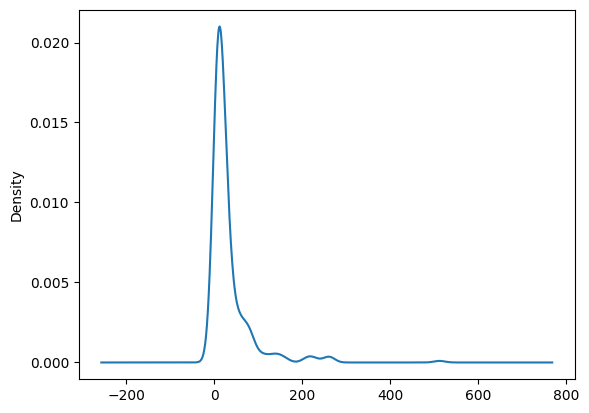

In [11]:
df['Fare'].plot(kind='kde')

In [20]:
#sample size=50 and no. of times 100
samples=[]
for i in range(100):
  samples.append(df['Fare'].dropna().sample(50).values.tolist())

In [21]:
samples=np.array(samples)

In [22]:
samples.shape

(100, 50)

In [23]:
sampling_means=samples.mean(axis=1)

In [24]:
import seaborn as sns

<Axes: ylabel='Density'>

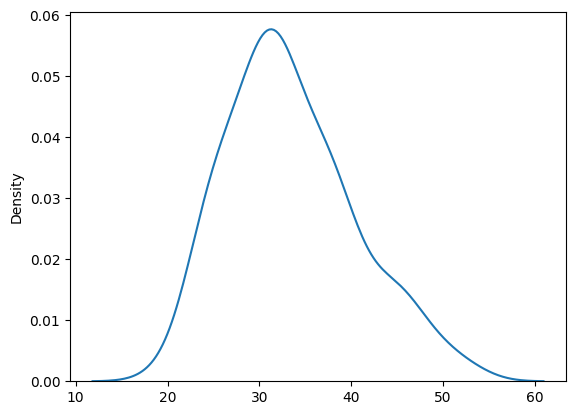

In [25]:
sns.kdeplot(sampling_means)

In [26]:
sampling_means.mean()

33.43989356

In [27]:
#this mean is not exactly equal to population mean but nearly equal to that
#so thats why instead of exact value it is preferred to give interval
#which is confidence interval
# we calc. this by telling -2*std to +2*std as that tell 95% confidence of
#sample mean equal to population mean as 2std cover 95%


In [28]:
sampling_means.std()/np.sqrt(50)

0.972351866681306

In [29]:
lower_limit=sampling_means.mean()-2*sampling_means.std()/np.sqrt(50)
upper_limit=sampling_means.mean()+2*sampling_means.std()/np.sqrt(50)

In [31]:
print(f'range is {lower_limit} to {upper_limit}')

range is 31.49518982663739 to 35.38459729336262


In [34]:
print(f'actual population mean {df["Fare"].dropna().mean()}')

actual population mean 33.29547928134557


In [35]:
#rather than point estimation we give interval estimation